<a href="https://colab.research.google.com/github/england98/EST-Project-1-4/blob/Data/Finedust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/FineDust2.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240783 entries, 0 to 240782
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   StationCode                240783 non-null  int64  
 1   Year                       240783 non-null  int64  
 2   Month                      240783 non-null  int64  
 3   Day                        240783 non-null  int64  
 4   Hour                       240783 non-null  int64  
 5   SO2                        234807 non-null  float64
 6   CO                         232664 non-null  float64
 7   O3                         233687 non-null  float64
 8   NO2                        234615 non-null  float64
 9   PM10                       232384 non-null  float64
 10  PM25                       225422 non-null  float64
 11  Temperature_C              240703 non-null  float64
 12  Precipitation_mm           23087 non-null   float64
 13  WindSpeed_mps              24

 0   StationCode                지역(관측소코드)

 1   Year                       연

 2   Month                      월

 3   Day                        일

 4   Hour                       시

 5   SO2                        이산화황 농도

 6   CO                         일산화탄소 농도

 7   O3                         오존 농도

 8   NO2                        이산화질소 농도

 9   PM10                       미세먼지 농도

 10  PM25                       초미세먼지 농도

 11  Temperature_C              기온

 12  Precipitation_mm           강수량

 13  WindSpeed_mps              풍속

 14  WindDirection_16Points     풍향

 15  Humidity_p                 습도

 16  VaporPressure_hPa          증기압

 17  DewPoint_C                 이슬점온도

 18  LocalPressure_hPa          현지기압

 19  SeaLevelPressure_hPa       해면기압

 20  Sunshine_Hours             일조량

 21  SolarRadiation_MJ_m2       일사량

 22  TotalCloudCoverage_10ths   전운량

 23  MidLowCloudCoverage_10ths  중하층운량

 24  Visibility_10m             시정(가시거리)

 25  GroundTemperature_C        지면온도

### 시간 흐름에 따른 PM10 농도 시각화


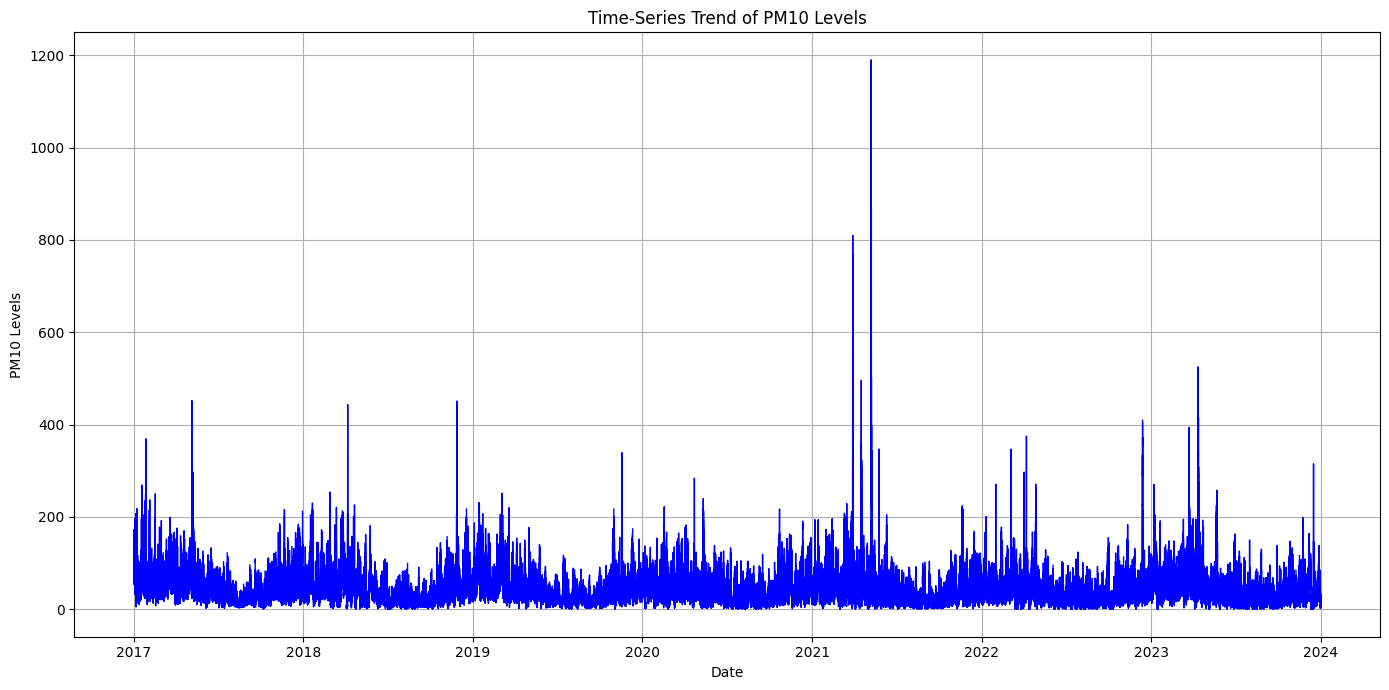

In [4]:
# Datetime column 추가
data['Datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])

# 데이터를 날짜순으로 정렬
data = data.sort_values(by='Datetime')

# 시간 흐름에 따른 PM10 농도 시각화
plt.figure(figsize=(14, 7))
plt.plot(data['Datetime'], data['PM10'], color='blue', linewidth=1)
plt.title('Time-Series Trend of PM10 Levels')
plt.xlabel('Date')
plt.ylabel('PM10 Levels')
plt.grid(True)
plt.tight_layout()
plt.show()

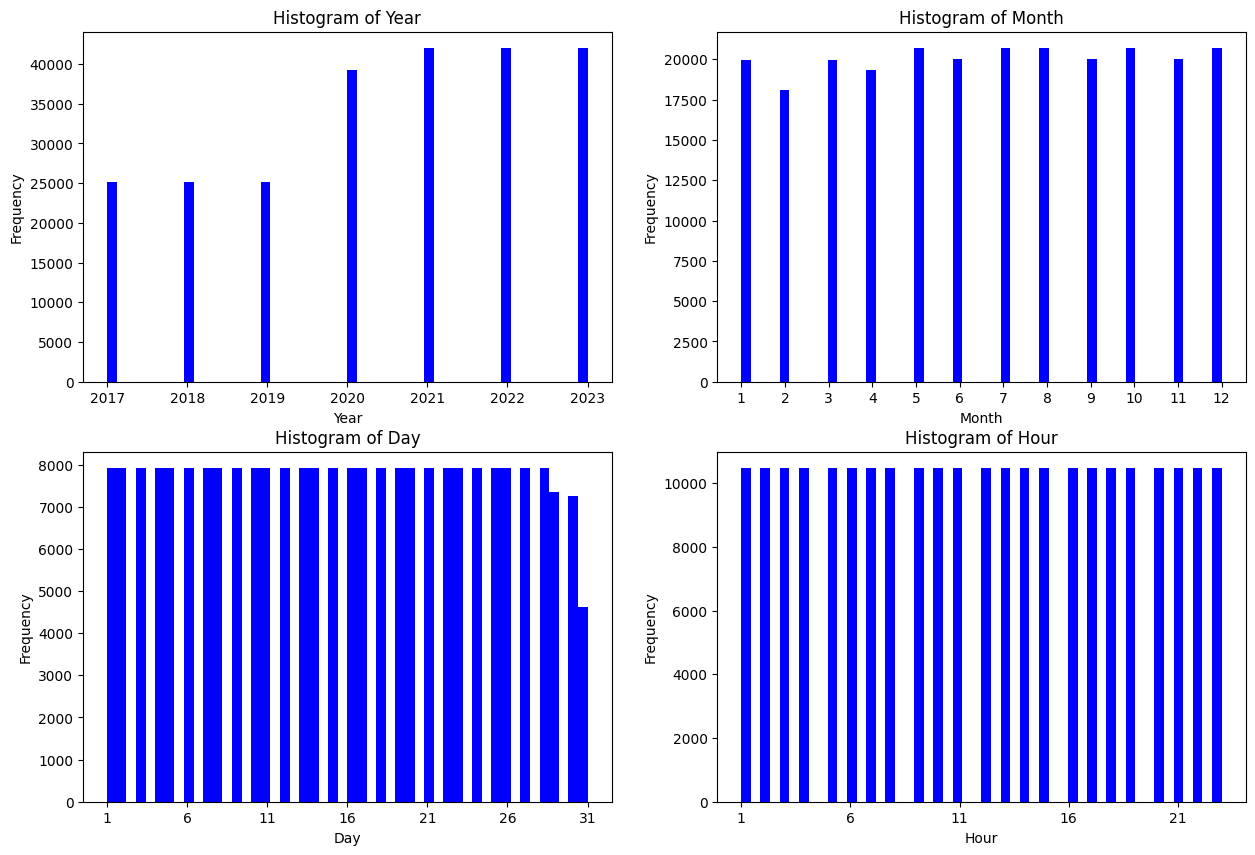

In [6]:
plt.figure(figsize=(15,10))

# 연도별 데이터 수
plt.subplot(2, 2, 1)
plt.hist(data['Year'], bins=50, color='blue')
plt.xticks(np.arange(2017,2024,1))
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 월별 데이터 수
plt.subplot(2, 2, 2)
plt.hist(data['Month'], bins=50, color='blue')
plt.xticks(np.arange(1,13,1))
plt.title('Histogram of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['Day'], bins=50, color='blue')
plt.xticks(np.arange(1,32,5))
plt.title('Histogram of Day')
plt.xlabel('Day')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(data['Hour'], bins=50,color='blue')
plt.xticks(np.arange(1,25,5))
plt.title('Histogram of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

plt.show()

### 결측치 시각화

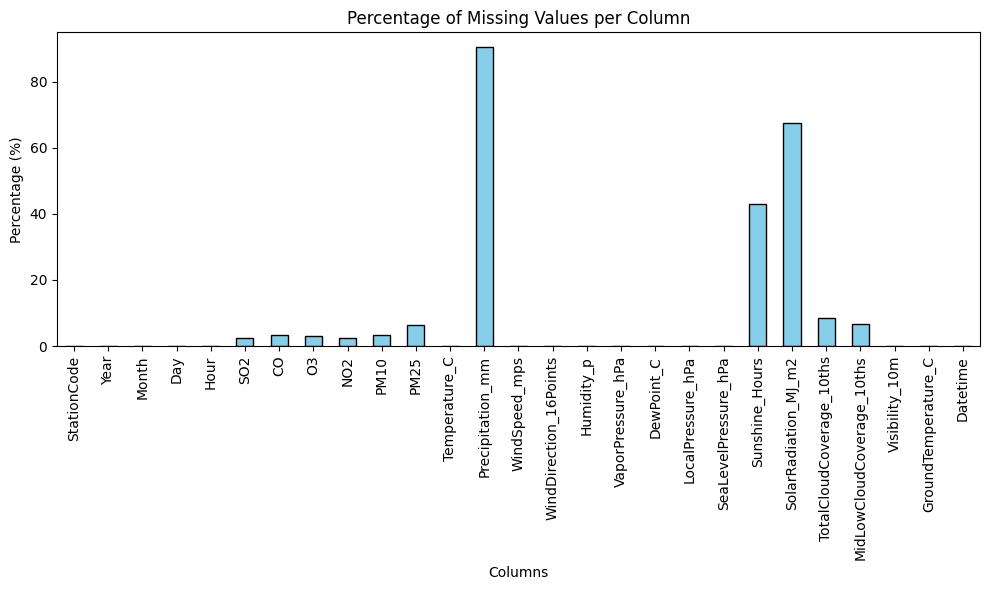

In [7]:
# 결측치 비율 확인
missing_percentage = data.isnull().mean() * 100

# 결측치 비율 시각화
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
missing_percentage

,0
StationCode,0.000000
Year,0.000000
Month,0.000000
Day,0.000000
Hour,0.000000
SO2,2.481903
CO,3.371916
O3,2.947052
NO2,2.561643
PM10,3.488203


### 상관관계 시각화 (PM10)



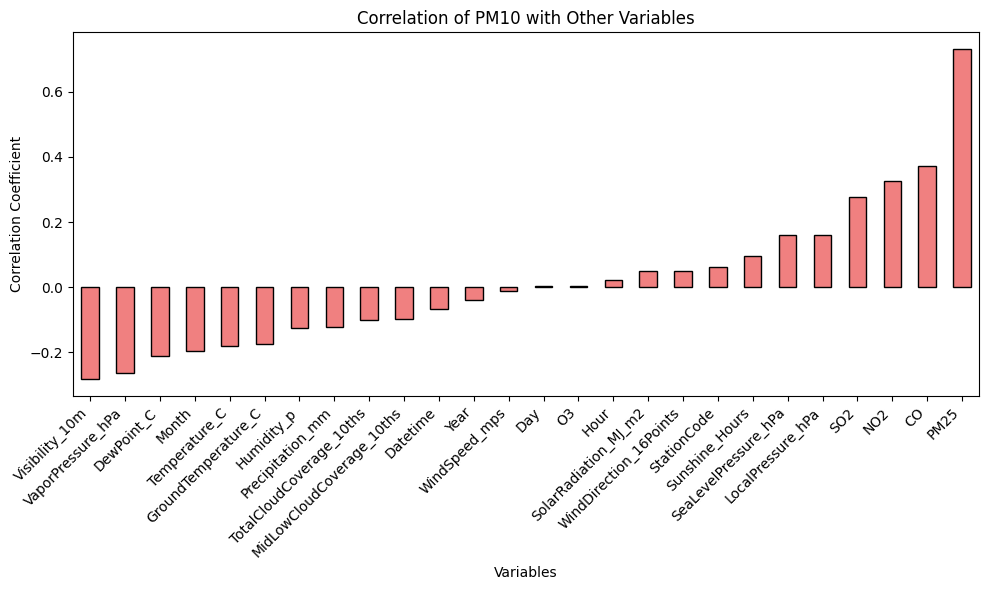

In [10]:
# 타겟 변수 (PM10)과의 상관관계 계산
pm10_correlation = data.corr()["PM10"].drop("PM10").sort_values()

# Create a bar plot for PM10 correlation with other variables
plt.figure(figsize=(10, 6))
pm10_correlation.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Correlation of PM10 with Other Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
columns_correlation_over_20 = pm10_correlation[pm10_correlation.abs() >= 0.2].index.tolist()

columns_correlation_over_10_under_20 = pm10_correlation[(pm10_correlation.abs() >= 0.1)&(pm10_correlation.abs() < 0.2)].index.tolist()

columns_correlation_under_10 = pm10_correlation[pm10_correlation.abs() < 0.1].index.tolist()

print('상관관계가 0.2 이상인 column : ',columns_correlation_over_20)
print('상관관계가 0.1 이상, 0.2 이하인 column : ',columns_correlation_over_10_under_20)
print('상관관계가 0.1 이하인 column : ',columns_correlation_under_10)

상관관계가 0.2 이상인 column :  ['Visibility_10m', 'VaporPressure_hPa', 'DewPoint_C', 'SO2', 'NO2', 'CO', 'PM25']
상관관계가 0.1 이상, 0.2 이하인 column :  ['Month', 'Temperature_C', 'GroundTemperature_C', 'Humidity_p', 'Precipitation_mm', 'SeaLevelPressure_hPa', 'LocalPressure_hPa']
상관관계가 0.1 이하인 column :  ['TotalCloudCoverage_10ths', 'MidLowCloudCoverage_10ths', 'Datetime', 'Year', 'WindSpeed_mps', 'Day', 'O3', 'Hour', 'SolarRadiation_MJ_m2', 'WindDirection_16Points', 'StationCode', 'Sunshine_Hours']


상관관계가 0.2 이상 :  ['Visibility_10m', 'VaporPressure_hPa', 'DewPoint_C', 'SO2', 'NO2', 'CO', 'PM25']

상관관계가 0.1 이상, 0.2 이하:  ['Month', 'Temperature_C', 'GroundTemperature_C', 'Humidity_p', 'Precipitation_mm', 'SeaLevelPressure_hPa', 'LocalPressure_hPa']

상관관계가 0.1 이하 :  ['TotalCloudCoverage_10ths', 'MidLowCloudCoverage_10ths', 'Datetime', 'Year', 'WindSpeed_mps', 'Day', 'O3', 'Hour', 'SolarRadiation_MJ_m2', 'WindDirection_16Points', 'StationCode', 'Sunshine_Hours']